In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import os

In [ ]:
import tensorflow as tf
from PIL import Image
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Input, Dense, Reshape, Conv2D, Conv2DTranspose, Flatten, Concatenate, Activation, LeakyReLU
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import Model
from tensorflow_addons.layers import SpectralNormalization, InstanceNormalization
from keras.layers import BatchNormalization
from keras.layers import ZeroPadding2D
from keras.layers import ReLU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Loading and Preprocessing Images**
loading grayscale and color images from specified directories, resize them to a common size (128x128 pixels), and store them in arrays X and y, and also compute color histograms for the images and visualize them.

In [ ]:
clr_path = "/content/drive/MyDrive/datas/color"
gry_path = "/content/drive/MyDrive/datas/black"

In [ ]:

clr_img_path = []

for img_path in os.listdir(clr_path) :
    clr_img_path.append(os.path.join(clr_path, img_path))

gry_img_path = []

for img_path in os.listdir(gry_path) :
    gry_img_path.append(os.path.join(gry_path, img_path))

clr_img_path.sort()
gry_img_path.sort()

In [ ]:

X = []
y = []

for i in tqdm(range(5000), desc="Processing images"):

    img1 = cv2.cvtColor(cv2.imread(clr_img_path[i]), cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(cv2.imread(gry_img_path[i]), cv2.COLOR_BGR2RGB)

    y.append(img_to_array(Image.fromarray(cv2.resize(img1,(128,128)))))
    X.append(img_to_array(Image.fromarray(cv2.resize(img2,(128,128)))))

Processing images: 100%|██████████| 5000/5000 [35:02<00:00,  2.38it/s]


In [ ]:
clr_img_path = [os.path.join(clr_path, img_name) for img_name in os.listdir(clr_path)]
gry_img_path = [os.path.join(gry_path, img_name) for img_name in os.listdir(gry_path)]

## **Histogram for Images**

In [ ]:
num_images_to_display = 6

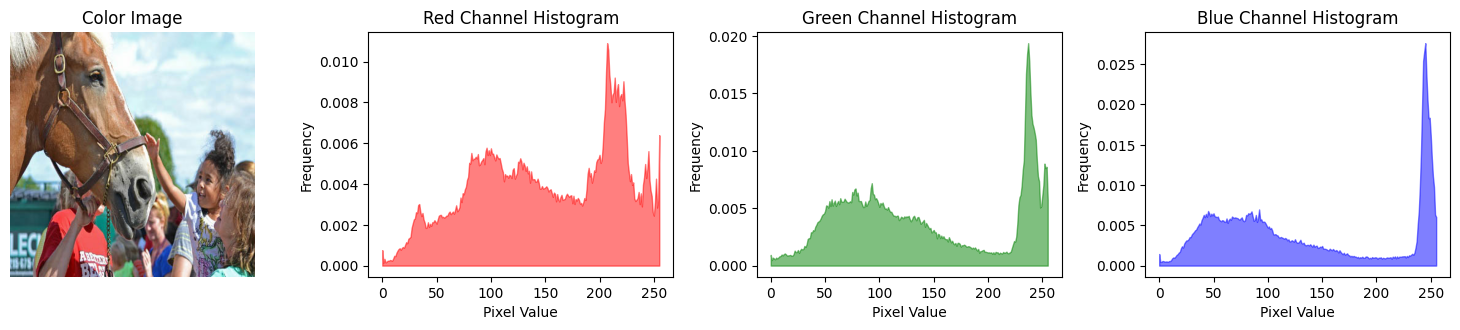

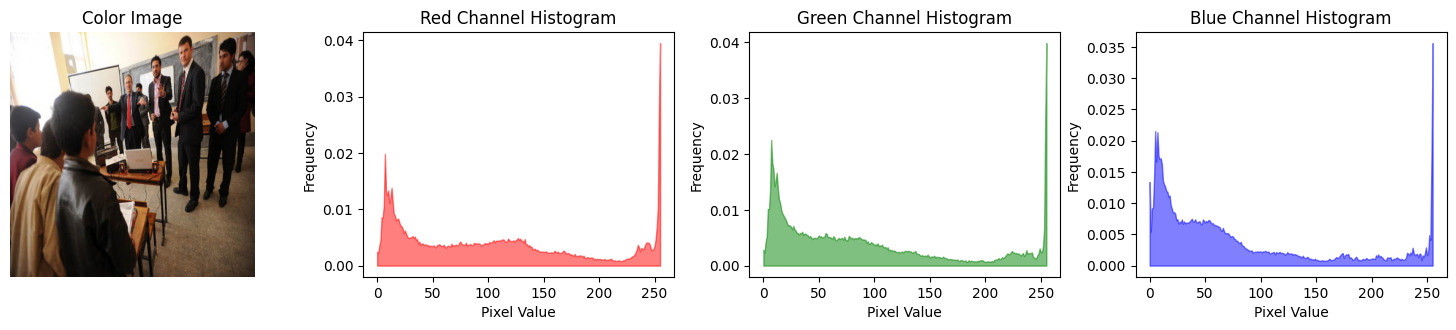

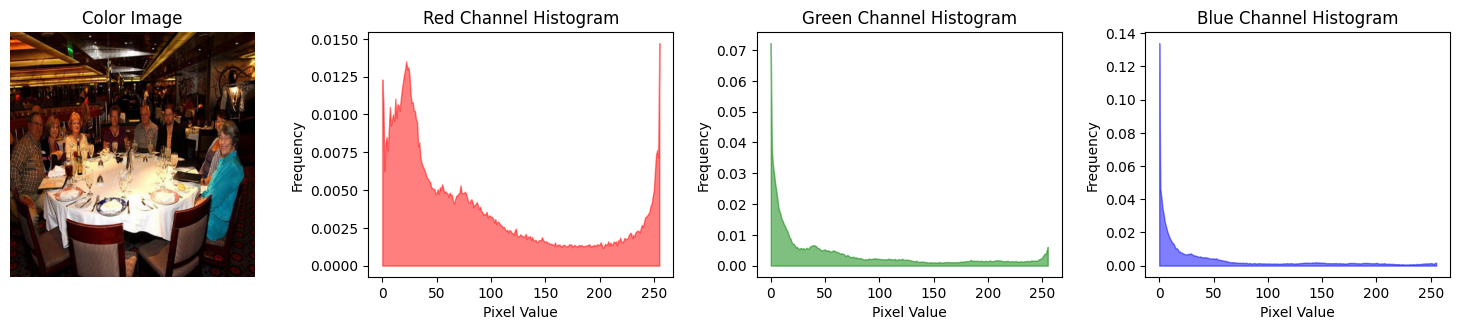

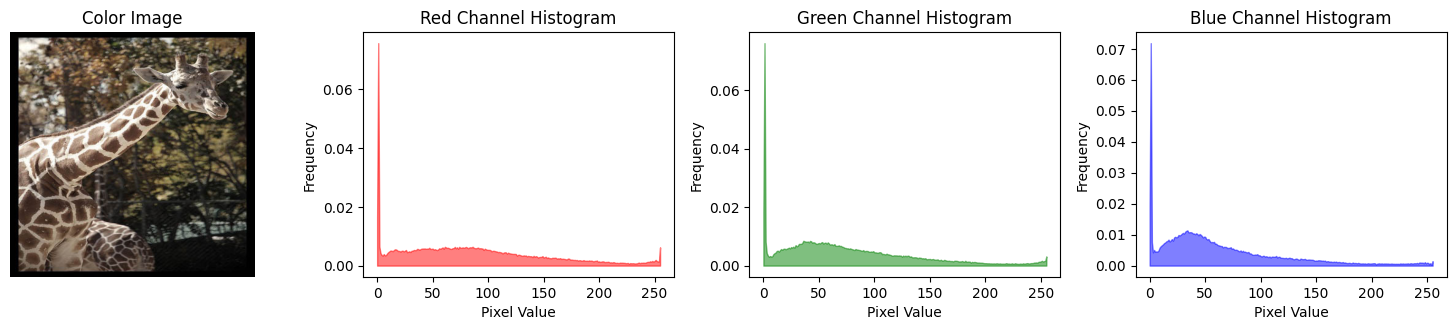

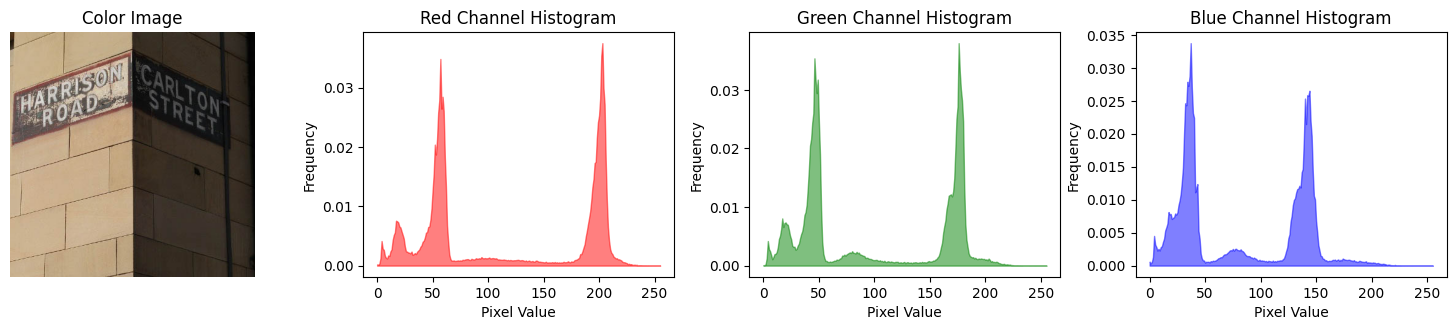

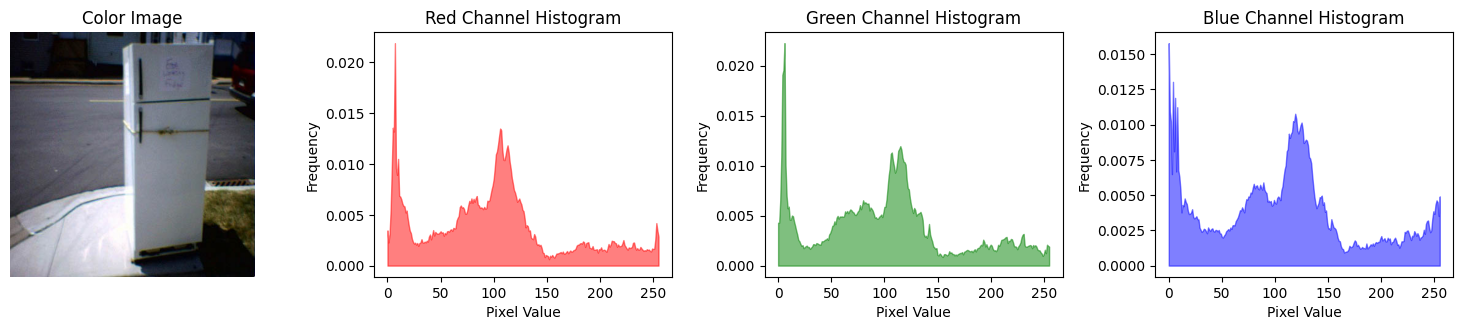

In [ ]:
for i in range(num_images_to_display):

    clr_img = cv2.cvtColor(cv2.imread(clr_img_path[i]), cv2.COLOR_BGR2RGB)


    red_hist = cv2.calcHist([clr_img], [0], None, [256], [0, 256])
    green_hist = cv2.calcHist([clr_img], [1], None, [256], [0, 256])
    blue_hist = cv2.calcHist([clr_img], [2], None, [256], [0, 256])


    red_hist = red_hist / red_hist.sum()
    green_hist = green_hist / green_hist.sum()
    blue_hist = blue_hist / blue_hist.sum()


    plt.figure(figsize=(15, 6))

    plt.subplot(2, 4, 1)
    plt.imshow(clr_img)
    plt.title('Color Image')
    plt.axis('off')

    plt.subplot(2, 4, 2)
    plt.fill_between(range(256), red_hist.flatten(), color='red', alpha=0.5)
    plt.title('Red Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.subplot(2, 4, 3)
    plt.fill_between(range(256), green_hist.flatten(), color='green', alpha=0.5)
    plt.title('Green Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.subplot(2, 4, 4)
    plt.fill_between(range(256), blue_hist.flatten(), color='blue', alpha=0.5)
    plt.title('Blue Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


## **Visualizing Sample Images from Datasets**

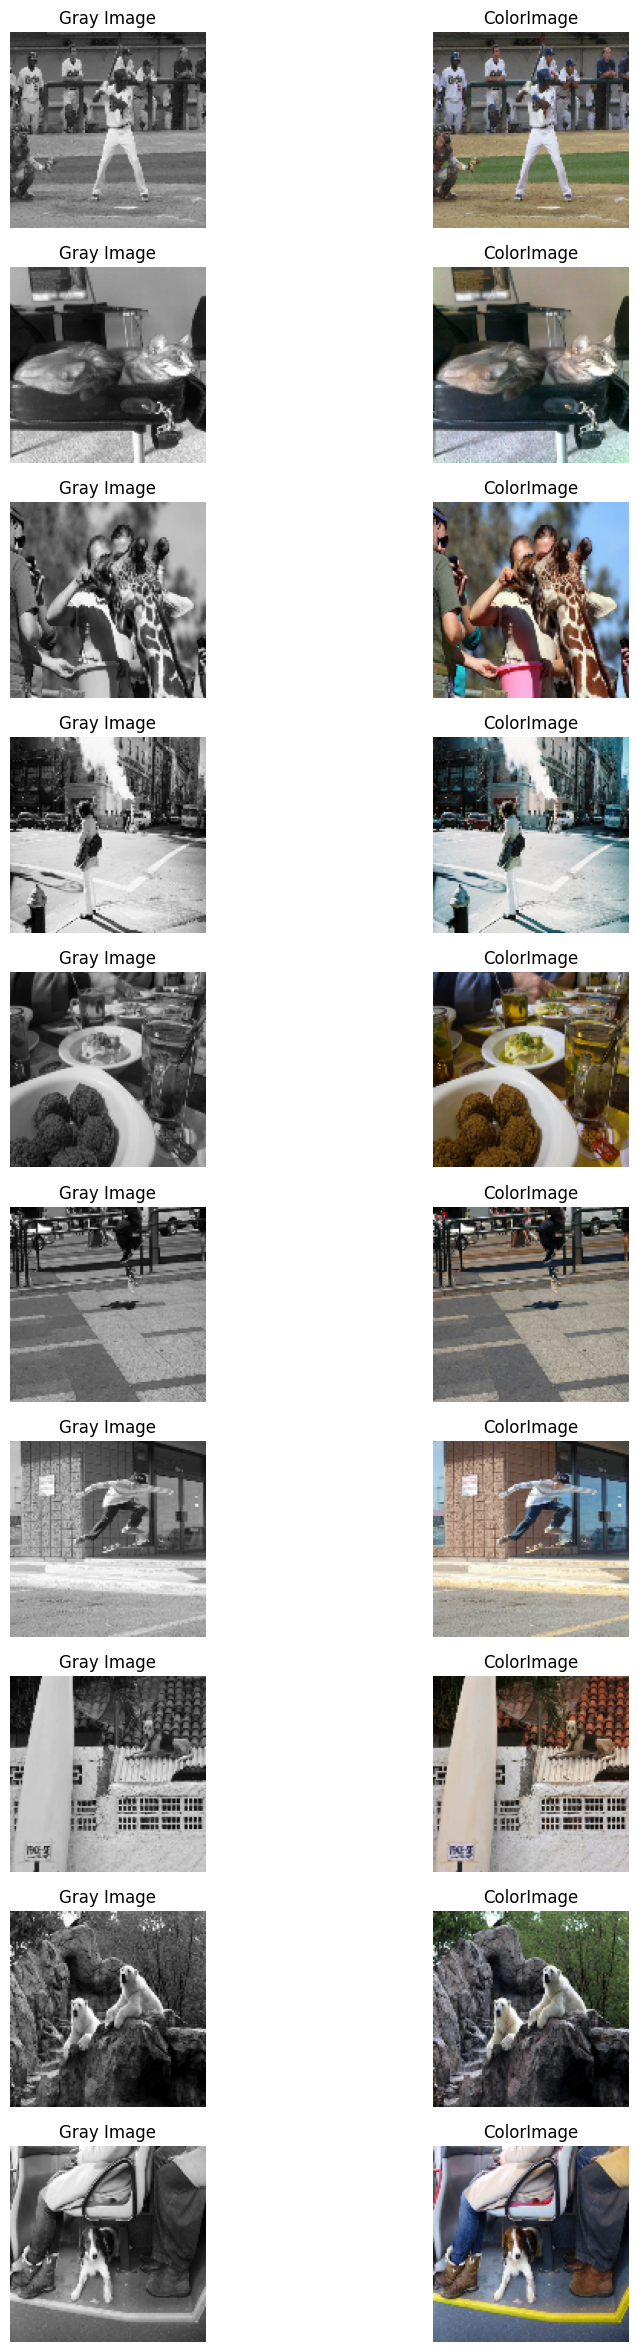

In [ ]:
plt.figure(figsize=(12, 40))

num_samples = 20

for i in range(num_samples):
    x = np.random.randint(0, 3000)

    plt.subplot(num_samples, 2, 2 * i + 1)
    plt.imshow(X[x] / 255.0, cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.axis('off')
    plt.title('Gray Image')

    plt.subplot(num_samples, 2, 2 * i + 2)
    plt.imshow(y[x] / 255.0)
    plt.axis('off')
    plt.title('Color Image')

plt.tight_layout()
plt.show()

## **Rescaling**

In [ ]:
X = np.array(X)
y = np.array(y)

X = (X/127.5) - 1
y = (y/127.5) - 1

# **Data splitting**
splitting the data into training and validation sets using train_test_split.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.10, shuffle = False)
init = RandomNormal(mean = 0.0, stddev = 0.02)